In [252]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind, chi2_contingency, f_oneway
import numpy as np
import nbconvert
import seaborn as sns
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [253]:
# data source: https://www.kaggle.com/spscientist/students-performance-in-exams  It should be noted that this is fictional data.
student_df = pd.read_csv('StudentsPerformance.csv')
print("First 5 rows of data: ")
print(student_df.head())
print("Column info: ")
print(student_df.info())
print("Stats on Numerical Columns: ")
print(student_df.describe())

First 5 rows of data: 
   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75  
Column info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column      

In [254]:
#Data Cleaning

#rename columns to variable-friendly names
student_df.columns = ['gender', 'ethnicity', 'parent_ed', 'lunch', 'test_prep', 'math_score', 'reading_score', 'writing_score']

#replace free/reduced from lunch column to variable_friendly name
student_df.lunch = student_df.lunch.replace('free/reduced', 'free_or_reduced')
print(student_df.lunch.value_counts())
print()

#remove apostrophe from degree titles for easier string usage
student_df.parent_ed = student_df.parent_ed.replace("associate's degree", 'associate degree')
student_df.parent_ed = student_df.parent_ed.replace("bachelor's degree", 'bachelor degree')
student_df.parent_ed = student_df.parent_ed.replace("master's degree", 'masters degree')

#parental level of education should be an ordinal categorical variable rather than nominal
print(student_df.parent_ed.value_counts()), print()
student_df.parent_ed = pd.Categorical(student_df.parent_ed, ['some high school', 'high school', 'some college', 'associate degree', 'bachelor degree', 'masters degree'], ordered = True)
print(student_df.parent_ed.unique())

standard           645
free_or_reduced    355
Name: lunch, dtype: int64

some college        226
associate degree    222
high school         196
some high school    179
bachelor degree     118
masters degree       59
Name: parent_ed, dtype: int64

['bachelor degree', 'some college', 'masters degree', 'associate degree', 'high school', 'some high school']
Categories (6, object): ['some high school' < 'high school' < 'some college' < 'associate degree' < 'bachelor degree' < 'masters degree']


Mean math score of female students: 63.633204633204635
Mean math score of male students: 68.72821576763485
Mean difference: -5.095011134430216


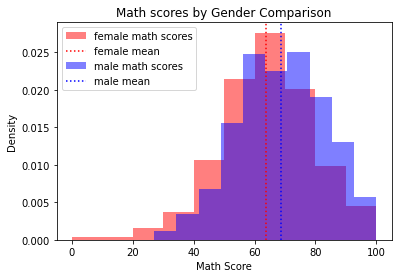

P-Value: 9.120185549328822e-08
There is a statistically significant difference between female and male math scores.
Male students averaged higher with statistical significance.



<Figure size 432x288 with 0 Axes>

In [255]:
#Hypothesis 1: relation between gender and math score
#Null Hyp: There is no association between a student's gender and their math score.
#Alt Hyp: There is a significant difference (5% significance threshhold) between the math scores of males vs females

#print(student_df.gender.value_counts())

female_math_scores = student_df.math_score[student_df.gender == 'female']
male_math_scores = student_df.math_score[student_df.gender == 'male']

female_math_mean = np.mean(female_math_scores)
male_math_mean =  np.mean(male_math_scores)
print("Mean math score of female students: " + str(female_math_mean))
print("Mean math score of male students: " + str(male_math_mean))
print("Mean difference: " + str(female_math_mean - male_math_mean))

plt.hist(female_math_scores, color = 'red', label = "female math scores", density = True, alpha = 0.5)
plt.axvline(female_math_mean, color = 'r', linestyle = 'dotted', label = "female mean")
plt.hist(male_math_scores, color = 'blue', label = "male math scores", density = True, alpha = 0.5)
plt.axvline(male_math_mean, color = 'b', linestyle = 'dotted', label = "male mean")
plt.legend()
plt.xlabel("Math Score")
plt.ylabel("Density")
plt.title("Math scores by Gender Comparison")
plt.savefig('gender_math_hist.png')
plt.show()
plt.clf()

#Two-sample T-Test
tstat, pval = ttest_ind(female_math_scores, male_math_scores)
print("P-Value: " + str(pval))
if pval < 0.05:
    print("There is a statistically significant difference between female and male math scores.")
    if female_math_mean > male_math_mean:
        print("Female students averaged higher with statistical significance.")
    else:
        print("Male students averaged higher with statistical significance.")
else:
    print("There is NOT a statistically significant difference between female and male math scores.")
print()

Mean reading score of female students: 72.60810810810811
Mean reading score of male students: 65.47302904564316
Mean difference: 7.135079062464953


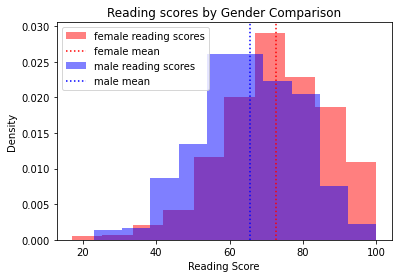

P-Value: 4.680538743933289e-15
There is a statistically significant difference between female and male reading scores.
Female students averaged higher with statistical significance.



<Figure size 432x288 with 0 Axes>

In [256]:
#Hypothesis 2: relation between gender and reading score
#Null Hyp: There is no association between a student's gender and their reading score.
#Alt Hyp: There is a significant difference (5% significance threshhold) between the reading scores of males vs females

female_reading_scores = student_df.reading_score[student_df.gender == 'female']
male_reading_scores = student_df.reading_score[student_df.gender == 'male']

female_reading_mean = np.mean(female_reading_scores)
male_reading_mean =  np.mean(male_reading_scores)
print("Mean reading score of female students: " + str(female_reading_mean))
print("Mean reading score of male students: " + str(male_reading_mean))
print("Mean difference: " + str(female_reading_mean - male_reading_mean))

plt.hist(female_reading_scores, color = 'red', label = "female reading scores", density = True, alpha = 0.5)
plt.axvline(female_reading_mean, color = 'r', linestyle = 'dotted', label = "female mean")
plt.hist(male_reading_scores, color = 'blue', label = "male reading scores", density = True, alpha = 0.5)
plt.axvline(male_reading_mean, color = 'b', linestyle = 'dotted', label = "male mean")
plt.legend()
plt.xlabel("Reading Score")
plt.ylabel("Density")
plt.title("Reading scores by Gender Comparison")
plt.savefig('gender_reading_hist.png')
plt.show()
plt.clf()

#Two-sample T-Test
tstat, pval = ttest_ind(female_reading_scores, male_reading_scores)
print("P-Value: " + str(pval))
if pval < 0.05:
    print("There is a statistically significant difference between female and male reading scores.")
    if female_reading_mean > male_reading_mean:
        print("Female students averaged higher with statistical significance.")
    else:
        print("Male students averaged higher with statistical significance.")
else:
    print("There is NOT a statistically significant difference between female and male reading scores.")
print()

Mean writing score of female students: 72.46718146718146
Mean writing score of male students: 63.31120331950208
Mean difference: 9.155978147679384


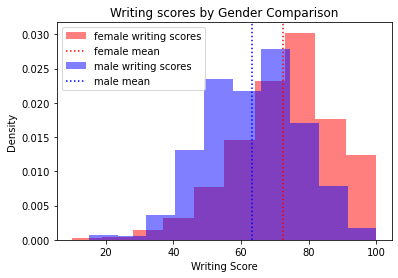

P-Value: 2.019877706867934e-22
There is a statistically significant difference between female and male writing scores.
Female students averaged higher with statistical significance.



<Figure size 432x288 with 0 Axes>

In [257]:
#Hypothesis 3: relation between gender and writing score
#Null Hyp: There is no association between a student's gender and their writing score.
#Alt Hyp: There is a significant difference (5% significance threshhold) between the writing scores of males vs females

female_writing_scores = student_df.writing_score[student_df.gender == 'female']
male_writing_scores = student_df.writing_score[student_df.gender == 'male']

female_writing_mean = np.mean(female_writing_scores)
male_writing_mean =  np.mean(male_writing_scores)
print("Mean writing score of female students: " + str(female_writing_mean))
print("Mean writing score of male students: " + str(male_writing_mean))
print("Mean difference: " + str(female_writing_mean - male_writing_mean))

plt.hist(female_writing_scores, color = 'red', label = "female writing scores", density = True, alpha = 0.5)
plt.axvline(female_writing_mean, color = 'r', linestyle = 'dotted', label = "female mean")
plt.hist(male_writing_scores, color = 'blue', label = "male writing scores", density = True, alpha = 0.5)
plt.axvline(male_writing_mean, color = 'b', linestyle = 'dotted', label = "male mean")
plt.legend()
plt.xlabel("Writing Score")
plt.ylabel("Density")
plt.title("Writing scores by Gender Comparison")
plt.savefig('gender_writing_hist.png')
plt.show()
plt.clf()

#Two-sample T-Test
tstat, pval = ttest_ind(female_writing_scores, male_writing_scores)
print("P-Value: " + str(pval))
if pval < 0.05:
    print("There is a statistically significant difference between female and male writing scores.")
    if female_writing_mean > male_writing_mean:
        print("Female students averaged higher with statistical significance.")
    else:
        print("Male students averaged higher with statistical significance.")
else:
    print("There is NOT a statistically significant difference between female and male writing scores.")
print()

Mean math score of standard lunch students: 70.03410852713178
Mean math score of free/reduced lunch students: 58.92112676056338
Mean difference: 11.112981766568396


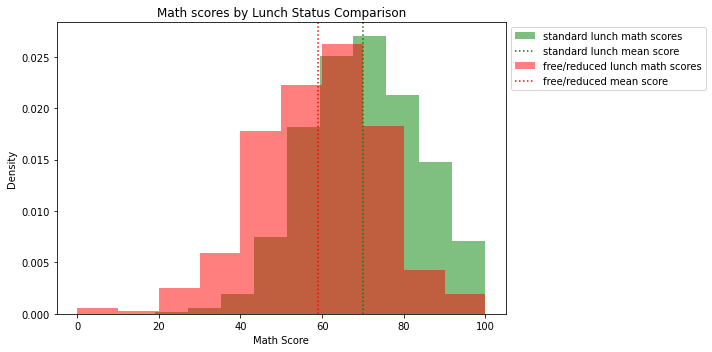

P-Value: 2.4131955993137074e-30
There is a statistically significant difference between standard and free/reduced lunch math scores.
Standard lunch students averaged higher with statistical significance.



<Figure size 432x288 with 0 Axes>

In [258]:
#Hypothesis 4: relation between lunch type and math score
#Null Hyp: There is no association between a student's lunch type and their math score.
#Alt Hyp: There is a significant difference (5% significance threshhold) between the math scores of free/reduced lunches vs standard lunches

standard_math_scores = student_df.math_score[student_df.lunch == 'standard']
free_or_reduced_math_scores = student_df.math_score[student_df.lunch == 'free_or_reduced']

standard_math_mean = np.mean(standard_math_scores)
free_or_reduced_math_mean =  np.mean(free_or_reduced_math_scores)
print("Mean math score of standard lunch students: " + str(standard_math_mean))
print("Mean math score of free/reduced lunch students: " + str(free_or_reduced_math_mean))
print("Mean difference: " + str(standard_math_mean - free_or_reduced_math_mean))

plt.figure(figsize = (10, 5))
plt.hist(standard_math_scores, color = 'green', label = "standard lunch math scores", density = True, alpha = 0.5)
plt.axvline(standard_math_mean, color = 'g', linestyle = 'dotted', label = "standard lunch mean score")
plt.hist(free_or_reduced_math_scores, color = 'red', label = "free/reduced lunch math scores", density = True, alpha = 0.5)
plt.axvline(free_or_reduced_math_mean, color = 'r', linestyle = 'dotted', label = "free/reduced mean score")
plt.legend(bbox_to_anchor=(1, 1))
plt.xlabel("Math Score")
plt.ylabel("Density")
plt.title("Math scores by Lunch Status Comparison")
plt.tight_layout()
plt.savefig('lunch_math_hist.png')
plt.show()
plt.clf()

#Two-sample T-Test
tstat, pval = ttest_ind(standard_math_scores, free_or_reduced_math_scores)
print("P-Value: " + str(pval))
if pval < 0.05:
    print("There is a statistically significant difference between standard and free/reduced lunch math scores.")
    if standard_math_mean > free_or_reduced_math_mean:
        print("Standard lunch students averaged higher with statistical significance.")
    else:
        print("Free/reduced lunch students averaged higher with statistical significance.")
else:
    print("There is NOT a statistically significant difference between standard and free/reduced lunch math scores.")
print()

Mean reading score of standard lunch students: 71.65426356589147
Mean reading score of free/reduced lunch students: 64.65352112676057
Mean difference: 7.000742439130903


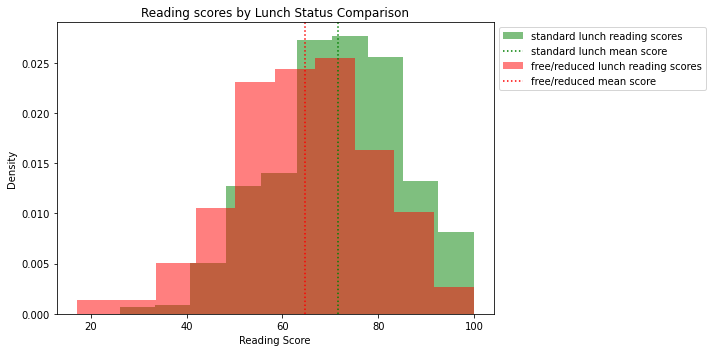

P-Value: 2.0027966545279011e-13
There is a statistically significant difference between standard and free/reduced lunch reading scores.
Standard lunch students averaged higher with statistical significance.



<Figure size 432x288 with 0 Axes>

In [259]:
#Hypothesis 5: relation between lunch type and reading score
#Null Hyp: There is no association between a student's lunch type and their reading score.
#Alt Hyp: There is a significant difference (5% significance threshhold) between the reading scores of free/reduced lunches vs standard lunches

standard_reading_scores = student_df.reading_score[student_df.lunch == 'standard']
free_or_reduced_reading_scores = student_df.reading_score[student_df.lunch == 'free_or_reduced']

standard_reading_mean = np.mean(standard_reading_scores)
free_or_reduced_reading_mean =  np.mean(free_or_reduced_reading_scores)
print("Mean reading score of standard lunch students: " + str(standard_reading_mean))
print("Mean reading score of free/reduced lunch students: " + str(free_or_reduced_reading_mean))
print("Mean difference: " + str(standard_reading_mean - free_or_reduced_reading_mean))

plt.figure(figsize = (10, 5))
plt.hist(standard_reading_scores, color = 'green', label = "standard lunch reading scores", density = True, alpha = 0.5)
plt.axvline(standard_reading_mean, color = 'g', linestyle = 'dotted', label = "standard lunch mean score")
plt.hist(free_or_reduced_reading_scores, color = 'red', label = "free/reduced lunch reading scores", density = True, alpha = 0.5)
plt.axvline(free_or_reduced_reading_mean, color = 'r', linestyle = 'dotted', label = "free/reduced mean score")
plt.legend(bbox_to_anchor=(1, 1))
plt.xlabel("Reading Score")
plt.ylabel("Density")
plt.title("Reading scores by Lunch Status Comparison")
plt.tight_layout()
plt.savefig('lunch_reading_hist.png')
plt.show()
plt.clf()

#Two-sample T-Test
tstat, pval = ttest_ind(standard_reading_scores, free_or_reduced_reading_scores)
print("P-Value: " + str(pval))
if pval < 0.05:
    print("There is a statistically significant difference between standard and free/reduced lunch reading scores.")
    if standard_reading_mean > free_or_reduced_reading_mean:
        print("Standard lunch students averaged higher with statistical significance.")
    else:
        print("Free/reduced lunch students averaged higher with statistical significance.")
else:
    print("There is NOT a statistically significant difference between standard and free/reduced lunch reading scores.")
print()

Mean writing score of standard lunch students: 70.8232558139535
Mean writing score of free/reduced lunch students: 63.02253521126761
Mean difference: 7.800720602685885


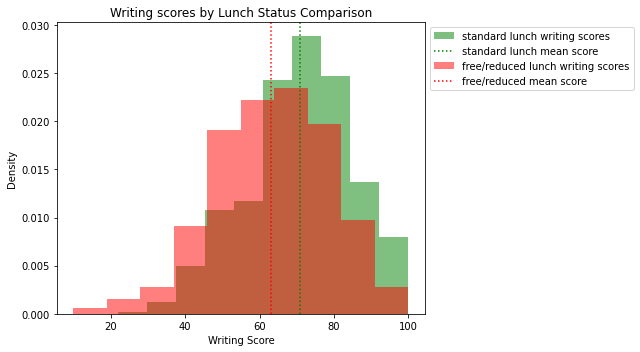

P-Value: 3.1861895831664765e-15
There is a statistically significant difference between standard and free/reduced lunch writing scores.
Standard lunch students averaged higher with statistical significance.



<Figure size 432x288 with 0 Axes>

In [260]:
#Hypothesis 6: relation between lunch type and writing score
#Null Hyp: There is no association between a student's lunch type and their writing score.
#Alt Hyp: There is a significant difference (5% significance threshhold) between the writing scores of free/reduced lunches vs standard lunches

standard_writing_scores = student_df.writing_score[student_df.lunch == 'standard']
free_or_reduced_writing_scores = student_df.writing_score[student_df.lunch == 'free_or_reduced']

standard_writing_mean = np.mean(standard_writing_scores)
free_or_reduced_writing_mean =  np.mean(free_or_reduced_writing_scores)
print("Mean writing score of standard lunch students: " + str(standard_writing_mean))
print("Mean writing score of free/reduced lunch students: " + str(free_or_reduced_writing_mean))
print("Mean difference: " + str(standard_writing_mean - free_or_reduced_writing_mean))

plt.figure(figsize = (9, 5))
plt.hist(standard_writing_scores, color = 'green', label = "standard lunch writing scores", density = True, alpha = 0.5)
plt.axvline(standard_writing_mean, color = 'g', linestyle = 'dotted', label = "standard lunch mean score")
plt.hist(free_or_reduced_writing_scores, color = 'red', label = "free/reduced lunch writing scores", density = True, alpha = 0.5)
plt.axvline(free_or_reduced_writing_mean, color = 'r', linestyle = 'dotted', label = "free/reduced mean score")
plt.legend(bbox_to_anchor=(1, 1))
plt.xlabel("Writing Score")
plt.ylabel("Density")
plt.title("Writing scores by Lunch Status Comparison")
plt.tight_layout()
plt.savefig('lunch_writing_hist.png')
plt.show()
plt.clf()

#Two-sample T-Test
tstat, pval = ttest_ind(standard_writing_scores, free_or_reduced_writing_scores)
print("P-Value: " + str(pval))
if pval < 0.05:
    print("There is a statistically significant difference between standard and free/reduced lunch writing scores.")
    if standard_writing_mean > free_or_reduced_writing_mean:
        print("Standard lunch students averaged higher with statistical significance.")
    else:
        print("Free/reduced lunch students averaged higher with statistical significance.")
else:
    print("There is NOT a statistically significant difference between standard and free/reduced lunch writing scores.")
print()

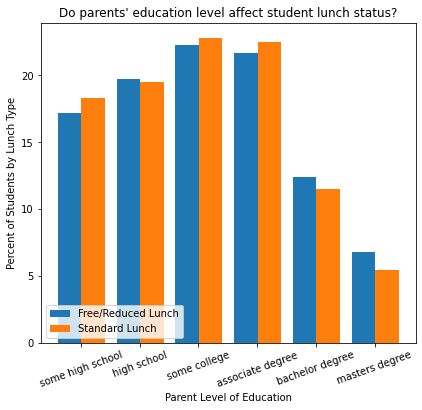

P-Value: 0.9531014927218223
There is NOT a statistically significant relationship between parental education level and whether the student receives free/reduced lunch.


<Figure size 432x288 with 0 Axes>

In [261]:
#Hypothesis 7: relation between parental level of education and lunch
#Null Hyp: The education level of a student's parents has no impact on whether they receive standard or free/reduced lunch
#Alt Hyp: There is a significant difference (5% significance threshhold) between the the type of lunch service a student received based on their parent's education level

#print(student_df.parent_ed.value_counts())
#print(student_df.lunch.value_counts())
#print(student_df.parent_ed.unique())

lunch_counts_by_parent_ed = student_df.groupby(['parent_ed', 'lunch']).gender.count().reset_index()
lunch_counts_by_parent_ed.rename(columns = {'gender': 'count'}, inplace = True)
#print(lunch_counts_by_parent_ed)

#need [list of standard lunch counts, ordered by parent_ed], [list of free_or_reduced lunch counts, ordered by parent_ed]
#pivot table?
#then will need to iterate through each list to convert it to a percent of the sum of that list
lunch_counts_by_parent_ed = lunch_counts_by_parent_ed.pivot(columns = 'parent_ed', index = 'lunch', values = 'count').reset_index()
#print(lunch_counts_by_parent_ed), print()

lunch_counts_by_parent_ed_lists = lunch_counts_by_parent_ed.values.tolist()
#print(lunch_counts_by_parent_ed_lists)

freeReduced_by_parentEd = lunch_counts_by_parent_ed_lists[0]
freeReduced_by_parentEd.pop(0)
freeReduced_by_parentEd_perc = [np.round(100*i/np.sum(freeReduced_by_parentEd), decimals = 1) for i in freeReduced_by_parentEd]
standard_by_parentEd = lunch_counts_by_parent_ed_lists[1]
standard_by_parentEd.pop(0)
standard_by_parentEd_perc = [np.round(100*i/np.sum(standard_by_parentEd), decimals = 1) for i in standard_by_parentEd]
#print(freeReduced_by_parentEd_perc, standard_by_parentEd_perc)


# free/reduced lunch x placement 
n = 1  # This is our first dataset (out of 2) 
t = 2 # Number of datasets 
d = 6 # Number of sets of bars 
w = 0.8 # Width of each bar 
x_values1 = [t*element + w*n for element  in range(d)]

# standard lunch x placement
n = 2  # This is our second dataset (out of 2) 
t = 2 # Number of datasets 
d = 6 # Number of sets of bars 
w = 0.8 # Width of each bar 
x_values2 = [t*element + w*n for element  in range(d)]

labels = ['some high school', 'high school', 'some college', 'associate degree', 'bachelor degree', 'masters degree']
plt.figure(figsize = (6, 5.8))
plt.bar(x_values1, freeReduced_by_parentEd_perc)
plt.bar(x_values2, standard_by_parentEd_perc)
ax = plt.subplot()
ax.set_xticks(2*np.arange(len(labels))+1.18, labels, rotation = 20)
plt.ylabel("Percent of Students by Lunch Type")
plt.xlabel("Parent Level of Education")
plt.legend(['Free/Reduced Lunch', 'Standard Lunch'], loc = 3)
plt.title("Do parents' education level affect student lunch status?")
plt.tight_layout()
plt.savefig('lunch_parentEd_bar.png')
plt.show()
plt.clf()


#chi-square test
Xtab = pd.crosstab(student_df.parent_ed, student_df.lunch)
#print(Xtab)
chi2, pval, dof, expected = chi2_contingency(Xtab)
#print(expected)
print("P-Value: " + str(pval))
if pval < 0.05:
    print("There is a statistically significant relationship between parental education level and whether the student receives free/reduced lunch.")
else: 
    print("There is NOT a statistically significant relationship between parental education level and whether the student receives free/reduced lunch.")

Mean math score of students who completed the Test Prep Course: 69.69553072625699
Mean math score of students who did not complete the Test Prep Course: 64.0778816199377
Mean difference: 5.617649106319291


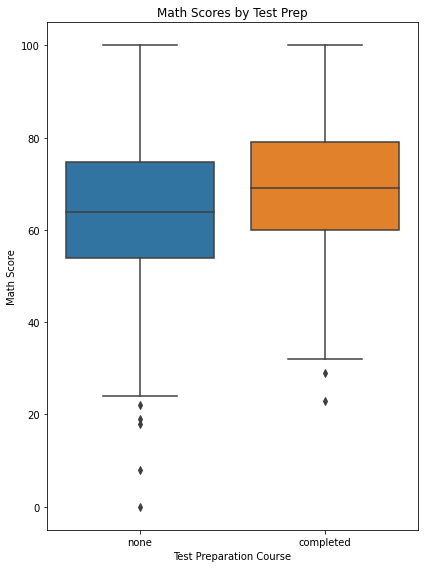

P-Value: 1.5359134607147415e-08
There is a statistically significant difference between math scores of students who completed the test prep course vs those who didn't.
Students who completed the test prep course averaged higher with statistical significance.



In [262]:
#Hypothesis 8: relation between test preparation course and math score
#Null Hyp: There is no association between whether a student took the test prep course and their math score.
#Alt Hyp: There is a significant difference (5% significance threshhold) between the math scores of students who took the test prep course vs those who did not.

testprep_math_scores = student_df.math_score[student_df.test_prep == 'completed']
#print(testprep_math_scores.describe())
noprep_math_scores = student_df.math_score[student_df.test_prep == 'none']
#print(noprep_math_scores.describe())

testprep_math_mean = np.mean(testprep_math_scores)
noprep_math_mean =  np.mean(noprep_math_scores)
print("Mean math score of students who completed the Test Prep Course: " + str(testprep_math_mean))
print("Mean math score of students who did not complete the Test Prep Course: " + str(noprep_math_mean))
print("Mean difference: " + str(testprep_math_mean - noprep_math_mean))

#side by side box plots for scores based on test prep
plt.figure(figsize = (6,8))
sns.boxplot(data = student_df, x = 'test_prep', y = 'math_score')
plt.ylabel("Math Score")
plt.xlabel("Test Preparation Course")
plt.title("Math Scores by Test Prep")
plt.tight_layout()
plt.savefig('testprep_math.png')
plt.show()

#Two-sample T-Test
tstat, pval = ttest_ind(testprep_math_scores, noprep_math_scores)
print("P-Value: " + str(pval))
if pval < 0.05:
    print("There is a statistically significant difference between math scores of students who completed the test prep course vs those who didn't.")
    if testprep_math_mean > noprep_math_mean:
        print("Students who completed the test prep course averaged higher with statistical significance.")
    else:
        print("Students who did NOT complete the test prep course averaged higher with statistical significance.")
else:
    print("There is NOT a statistically significant difference between math scores of students who completed the test prep course vs those who didn't.")
print()

Mean reading score of students who completed the Test Prep Course: 73.89385474860335
Mean reading score of students who did not complete the Test Prep Course: 66.53426791277259
Mean difference: 7.359586835830754


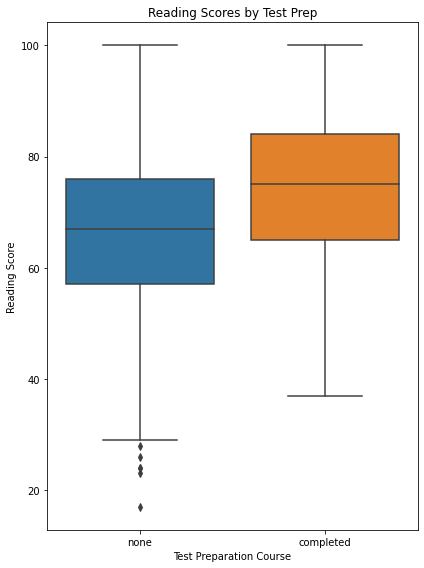

P-Value: 9.081783336892205e-15
There is a statistically significant difference between reading scores of students who completed the test prep course vs those who didn't.
Students who completed the test prep course averaged higher with statistical significance.



In [263]:
#Hypothesis 9: relation between test preparation course and reading score
#Null Hyp: There is no association between whether a student took the test prep course and their reading score.
#Alt Hyp: There is a significant difference (5% significance threshhold) between the reading scores of students who took the test prep course vs those who did not.

testprep_reading_scores = student_df.reading_score[student_df.test_prep == 'completed']
#print(testprep_reading_scores.describe())
noprep_reading_scores = student_df.reading_score[student_df.test_prep == 'none']
#print(noprep_reading_scores.describe())

testprep_reading_mean = np.mean(testprep_reading_scores)
noprep_reading_mean =  np.mean(noprep_reading_scores)
print("Mean reading score of students who completed the Test Prep Course: " + str(testprep_reading_mean))
print("Mean reading score of students who did not complete the Test Prep Course: " + str(noprep_reading_mean))
print("Mean difference: " + str(testprep_reading_mean - noprep_reading_mean))

#side by side box plots for scores based on test prep
plt.figure(figsize = (6,8))
sns.boxplot(data = student_df, x = 'test_prep', y = 'reading_score')
plt.ylabel("Reading Score")
plt.xlabel("Test Preparation Course")
plt.title("Reading Scores by Test Prep")
plt.tight_layout()
plt.savefig('testprep_reading.png')
plt.show()

#Two-sample T-Test
tstat, pval = ttest_ind(testprep_reading_scores, noprep_reading_scores)
print("P-Value: " + str(pval))
if pval < 0.05:
    print("There is a statistically significant difference between reading scores of students who completed the test prep course vs those who didn't.")
    if testprep_reading_mean > noprep_reading_mean:
        print("Students who completed the test prep course averaged higher with statistical significance.")
    else:
        print("Students who did NOT complete the test prep course averaged higher with statistical significance.")
else:
    print("There is NOT a statistically significant difference between reading scores of students who completed the test prep course vs those who didn't.")
print()

Mean writing score of students who completed the Test Prep Course: 74.41899441340782
Mean writing score of students who did not complete the Test Prep Course: 64.50467289719626
Mean difference: 9.914321516211558


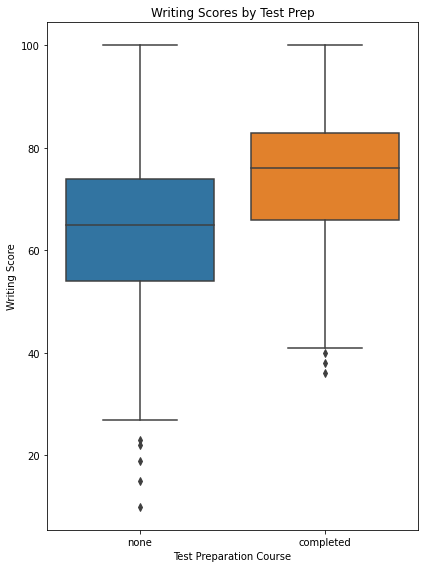

P-Value: 3.68529173524572e-24
There is a statistically significant difference between writing scores of students who completed the test prep course vs those who didn't.
Students who completed the test prep course averaged higher with statistical significance.



In [264]:
#Hypothesis 10: relation between test preparation course and writing score
#Null Hyp: There is no association between whether a student took the test prep course and their writing score.
#Alt Hyp: There is a significant difference (5% significance threshhold) between the writing scores of students who took the test prep course vs those who did not.

testprep_writing_scores = student_df.writing_score[student_df.test_prep == 'completed']
#print(testprep_writing_scores.describe())
noprep_writing_scores = student_df.writing_score[student_df.test_prep == 'none']
#print(noprep_writing_scores.describe())

testprep_writing_mean = np.mean(testprep_writing_scores)
noprep_writing_mean =  np.mean(noprep_writing_scores)
print("Mean writing score of students who completed the Test Prep Course: " + str(testprep_writing_mean))
print("Mean writing score of students who did not complete the Test Prep Course: " + str(noprep_writing_mean))
print("Mean difference: " + str(testprep_writing_mean - noprep_writing_mean))

#side by side box plots for scores based on test prep
plt.figure(figsize = (6,8))
sns.boxplot(data = student_df, x = 'test_prep', y = 'writing_score')
plt.ylabel("Writing Score")
plt.xlabel("Test Preparation Course")
plt.title("Writing Scores by Test Prep")
plt.tight_layout()
plt.savefig('testprep_writing.png')
plt.show()

#Two-sample T-Test
tstat, pval = ttest_ind(testprep_writing_scores, noprep_writing_scores)
print("P-Value: " + str(pval))
if pval < 0.05:
    print("There is a statistically significant difference between writing scores of students who completed the test prep course vs those who didn't.")
    if testprep_writing_mean > noprep_writing_mean:
        print("Students who completed the test prep course averaged higher with statistical significance.")
    else:
        print("Students who did NOT complete the test prep course averaged higher with statistical significance.")
else:
    print("There is NOT a statistically significant difference between writing scores of students who completed the test prep course vs those who didn't.")
print()

P-value: 1.3732194030370688e-11
There is a statistically significant difference in math scores among the ethnic groups in this data.

 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1  group2 meandiff p-adj   lower   upper  reject
------------------------------------------------------
group A group B   1.8234 0.8597   -3.36  7.0068  False
group A group C   2.8347 0.4966 -2.0028  7.6723  False
group A group D   5.7334 0.0138  0.7824 10.6844   True
group A group E  12.1922  0.001  6.7215 17.6629   True
group B group C   1.0113    0.9 -2.6867  4.7094  False
group B group D     3.91 0.0441  0.0647  7.7552   True
group B group E  10.3688  0.001  5.8741 14.8635   True
group C group D   2.8986 0.1287 -0.4659  6.2632  False
group C group E   9.3575  0.001  5.2665 13.4485   True
group D group E   6.4588  0.001  2.2343 10.6834   True
------------------------------------------------------

There are statistically siginificant differences in math scores between:
group A and group D
gr

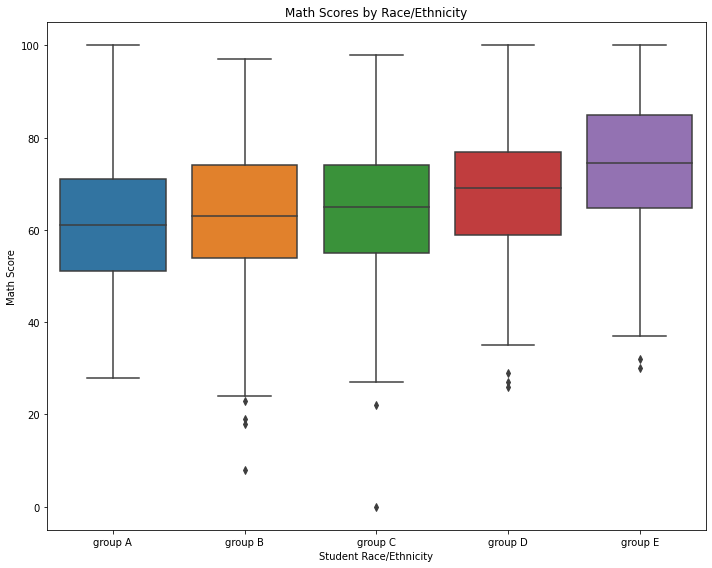

In [267]:
#Hypothesis 11: relation between race and math score
#Null Hyp: There is no association between a student's ethnicity and their math score.
#Alt Hyp: There is a significant difference (5% significance threshhold) between the math scores of students of different ethnicities.

#print(student_df.ethnicity.value_counts())
groupA_math_scores = student_df.math_score[student_df.ethnicity == 'group A']
groupB_math_scores = student_df.math_score[student_df.ethnicity == 'group B']
groupC_math_scores = student_df.math_score[student_df.ethnicity == 'group C']
groupD_math_scores = student_df.math_score[student_df.ethnicity == 'group D']
groupE_math_scores = student_df.math_score[student_df.ethnicity == 'group E']

#ANOVA Hyp Test
fastat, pval = f_oneway(groupA_math_scores, groupB_math_scores, groupC_math_scores, groupD_math_scores, groupE_math_scores)
print("P-value: " + str(pval))
if pval < 0.5:
    print("There is a statistically significant difference in math scores among the ethnic groups in this data."), print()
else:
    print("There is NOT a statistically significant difference in math scores among the ethnic groups in this data."), print()
    
#Tukey Range Test -- which group(s) have the significant differences?
tukey_results = pairwise_tukeyhsd(student_df.math_score, student_df.ethnicity, 0.05)  
print(tukey_results), print()

rows = tukey_results.summary().data[1:]
#print(rows)

print("There are statistically siginificant differences in math scores between:")
for list in rows:
    group1 = list[0]
    group2 = list[1]
    significance = list[-1]
    if significance == True:
        print(group1 + " and " + group2)
print()
        
tukey_df = pd.DataFrame(rows, columns = ['group1',  'group2', 'meandiff', 'p_adj',   'lower',   'upper',  'reject'])
max_meandiff = tukey_df.meandiff.max()
max_meandiff_row = tukey_df.meandiff.idxmax()
 
max_diff_group1 = tukey_df.iloc[max_meandiff_row][0]  
max_diff_group2 = tukey_df.iloc[max_meandiff_row][1]  
print("The largest difference in math scores was " + str(max_meandiff) + "% between " + str(max_diff_group1) + " and " + str(max_diff_group2))


#Side-by-side box plots
plt.figure(figsize = (10,8))
sns.boxplot(data = student_df, x = 'ethnicity', y = 'math_score', order = ['group A', 'group B', 'group C', 'group D', 'group E'])
plt.ylabel("Math Score")
plt.xlabel("Student Race/Ethnicity")
plt.title("Math Scores by Race/Ethnicity")
plt.tight_layout()
plt.savefig('ethnicity_math.png')
plt.show()

P-value: 0.0001780089103235947
There is a statistically significant difference in reading scores among the ethnic groups in this data.

 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1  group2 meandiff p-adj   lower   upper  reject
------------------------------------------------------
group A group B   2.6785 0.5875 -2.3998  7.7567  False
group A group C   4.4293 0.0801 -0.3101  9.1687  False
group A group D   5.3564 0.0219  0.5058 10.2069   True
group A group E   8.3544  0.001  2.9947 13.7141   True
group B group C   1.7508  0.656 -1.8722  5.3738  False
group B group D   2.6779 0.2956 -1.0893  6.4451  False
group B group E   5.6759 0.0041  1.2724 10.0794   True
group C group D   0.9271    0.9 -2.3692  4.2234  False
group C group E   3.9251 0.0583 -0.0829  7.9331  False
group D group E    2.998 0.2768 -1.1408  7.1369  False
------------------------------------------------------

There are statistically siginificant differences in reading scores between:
group A and group

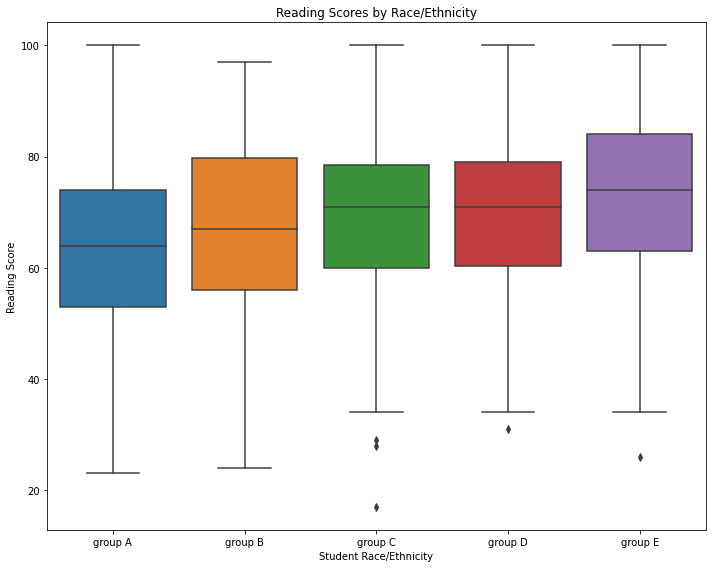

In [268]:
#Hypothesis 12: relation between race and reading score
#Null Hyp: There is no association between a student's ethnicity and their reading score.
#Alt Hyp: There is a significant difference (5% significance threshhold) between the reading scores of students of different ethnicities.

#print(student_df.ethnicity.value_counts())
groupA_reading_scores = student_df.reading_score[student_df.ethnicity == 'group A']
groupB_reading_scores = student_df.reading_score[student_df.ethnicity == 'group B']
groupC_reading_scores = student_df.reading_score[student_df.ethnicity == 'group C']
groupD_reading_scores = student_df.reading_score[student_df.ethnicity == 'group D']
groupE_reading_scores = student_df.reading_score[student_df.ethnicity == 'group E']

#ANOVA Hyp Test
fastat, pval = f_oneway(groupA_reading_scores, groupB_reading_scores, groupC_reading_scores, groupD_reading_scores, groupE_reading_scores)
print("P-value: " + str(pval))
if pval < 0.5:
    print("There is a statistically significant difference in reading scores among the ethnic groups in this data."), print()
else:
    print("There is NOT a statistically significant difference in reading scores among the ethnic groups in this data."), print()
    
#Tukey Range Test -- which group(s) have the significant differences?
tukey_results = pairwise_tukeyhsd(student_df.reading_score, student_df.ethnicity, 0.05)  
print(tukey_results), print()

rows = tukey_results.summary().data[1:]
#print(rows)

print("There are statistically siginificant differences in reading scores between:")
for list in rows:
    group1 = list[0]
    group2 = list[1]
    significance = list[-1]
    if significance == True:
        print(group1 + " and " + group2)
print()
        
tukey_df = pd.DataFrame(rows, columns = ['group1',  'group2', 'meandiff', 'p_adj',   'lower',   'upper',  'reject'])
max_meandiff = tukey_df.meandiff.max()
max_meandiff_row = tukey_df.meandiff.idxmax()
 
max_diff_group1 = tukey_df.iloc[max_meandiff_row][0]  
max_diff_group2 = tukey_df.iloc[max_meandiff_row][1]  
print("The largest difference in reading scores was " + str(max_meandiff) + "% between " + str(max_diff_group1) + " and " + str(max_diff_group2))


#Side-by-side box plots
plt.figure(figsize = (10,8))
sns.boxplot(data = student_df, x = 'ethnicity', y = 'reading_score', order = ['group A', 'group B', 'group C', 'group D', 'group E'])
plt.ylabel("Reading Score")
plt.xlabel("Student Race/Ethnicity")
plt.title("Reading Scores by Race/Ethnicity")
plt.tight_layout()
plt.savefig('ethnicity_reading.png')
plt.show()

P-value: 1.0979189070067382e-05
There is a statistically significant difference in writing scores among the ethnic groups in this data.

 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1  group2 meandiff p-adj   lower   upper  reject
------------------------------------------------------
group A group B   2.9258 0.5444 -2.3436  8.1953  False
group A group C   5.1534 0.0346  0.2356 10.0712   True
group A group D   7.4709  0.001  2.4377  12.504   True
group A group E    8.733  0.001  3.1715 14.2945   True
group B group C   2.2276 0.4857 -1.5318   5.987  False
group B group D    4.545 0.0133   0.636  8.4541   True
group B group E   5.8071 0.0049  1.2379 10.3764   True
group C group D   2.3175 0.3448 -1.1029  5.7378  False
group C group E   3.5796 0.1294 -0.5793  7.7385  False
group D group E   1.2621    0.9 -3.0326  5.5568  False
------------------------------------------------------

There are statistically siginificant differences in writing scores between:
group A and grou

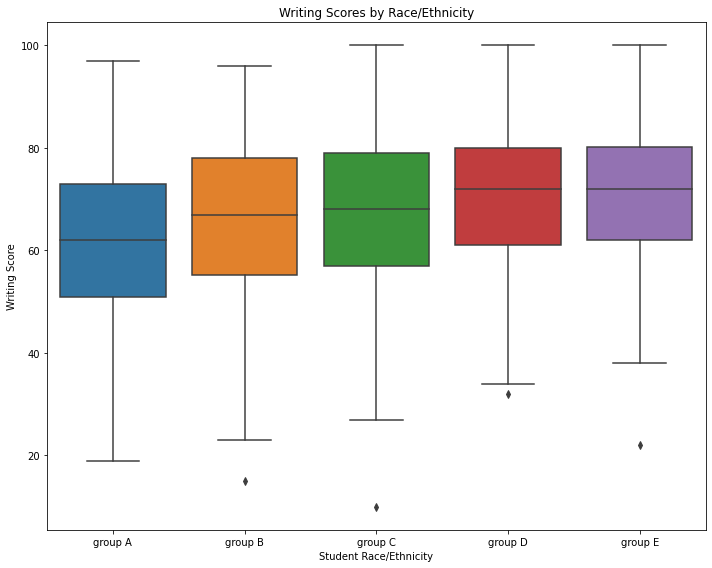

In [269]:
#Hypothesis 13: relation between race and writing score
#Null Hyp: There is no association between a student's ethnicity and their writing score.
#Alt Hyp: There is a significant difference (5% significance threshhold) between the writing scores of students of different ethnicities.

#print(student_df.ethnicity.value_counts())
groupA_writing_scores = student_df.writing_score[student_df.ethnicity == 'group A']
groupB_writing_scores = student_df.writing_score[student_df.ethnicity == 'group B']
groupC_writing_scores = student_df.writing_score[student_df.ethnicity == 'group C']
groupD_writing_scores = student_df.writing_score[student_df.ethnicity == 'group D']
groupE_writing_scores = student_df.writing_score[student_df.ethnicity == 'group E']

#ANOVA Hyp Test
fastat, pval = f_oneway(groupA_writing_scores, groupB_writing_scores, groupC_writing_scores, groupD_writing_scores, groupE_writing_scores)
print("P-value: " + str(pval))
if pval < 0.5:
    print("There is a statistically significant difference in writing scores among the ethnic groups in this data."), print()
else:
    print("There is NOT a statistically significant difference in writing scores among the ethnic groups in this data."), print()
    
#Tukey Range Test -- which group(s) have the significant differences?
tukey_results = pairwise_tukeyhsd(student_df.writing_score, student_df.ethnicity, 0.05)  
print(tukey_results), print()

rows = tukey_results.summary().data[1:]
#print(rows)

print("There are statistically siginificant differences in writing scores between:")
for list in rows:
    group1 = list[0]
    group2 = list[1]
    significance = list[-1]
    if significance == True:
        print(group1 + " and " + group2)
print()
        
tukey_df = pd.DataFrame(rows, columns = ['group1',  'group2', 'meandiff', 'p_adj',   'lower',   'upper',  'reject'])
max_meandiff = tukey_df.meandiff.max()
max_meandiff_row = tukey_df.meandiff.idxmax()
 
max_diff_group1 = tukey_df.iloc[max_meandiff_row][0]  
max_diff_group2 = tukey_df.iloc[max_meandiff_row][1]  
print("The largest difference in writing scores was " + str(max_meandiff) + "% between " + str(max_diff_group1) + " and " + str(max_diff_group2))


#Side-by-side box plots
plt.figure(figsize = (10,8))
sns.boxplot(data = student_df, x = 'ethnicity', y = 'writing_score', order = ['group A', 'group B', 'group C', 'group D', 'group E'])
plt.ylabel("Writing Score")
plt.xlabel("Student Race/Ethnicity")
plt.title("Writing Scores by Race/Ethnicity")
plt.tight_layout()
plt.savefig('ethnicity_writing.png')
plt.show()